In [25]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from planning import prune_path, smooth_path
from planning import breadth_first_search

np.set_printoptions(precision=2)

In [26]:
# read data
ind = np.random.randint(0, 214)

elev_map = np.load('./data/elev_map{}.npy'.format(ind))
dynamic_pc = np.load('./data/dynamic_pc{}.npy'.format(ind))
robot_pose = np.load('./data/robot_pose{}.npy'.format(ind))
x_min, y_min = np.min(elev_map[:, 0]), np.min(elev_map[:, 1])
x_max, y_max = np.max(elev_map[:, 0]), np.max(elev_map[:, 1])

map_res = 0.15
margin = 0.3
random_robot_pose = False

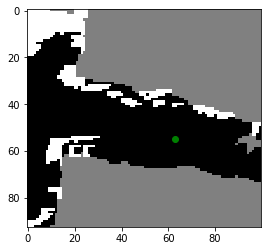

In [27]:
# create grid
grid, elev_grid = create_grid(elev_map, map_res=map_res, safety_distance=0.15, margin=margin)
# robot location on a grid
start_grid = (np.array([robot_pose[0], robot_pose[1]]) - [x_min, y_min]) // map_res
# random robot start position
if random_robot_pose:
    while True:
        x,y = np.random.random()*(x_max-x_min) + x_min, np.random.random()*(y_max-y_min) + y_min
        i,j = (np.array([x, y]) - [x_min, y_min]) // map_res
        i = int(i); j = int(j)
        if grid[i,j] != 1 and grid[i,j] != 0.5:
            start_grid = np.array([i,j])
            robot_pose[:2] = x,y
            break
    
plt.imshow(grid, cmap='gray')
plt.plot(start_grid[1], start_grid[0], 'ro', color='g')

In [28]:
print(np.unique(grid)) # read cell values: free, unexplored and obstacles

[0.  0.5 1. ]


BFS: found a frontier


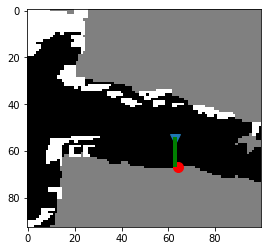

In [29]:
# BFS planning to nearest frontier
path_grid, goal_grid = breadth_first_search(grid, (start_grid).astype(int).tolist())

plt.imshow(grid, cmap='gray')
plt.plot(start_grid[1], start_grid[0], 'v', markersize=10)
plt.plot(goal_grid[1], goal_grid[0], 'ro', markersize=10)

pp = np.array(path_grid)
if len(path_grid)>0: plt.plot(pp[:, 1], pp[:, 0], 'g', linewidth=4)

In [30]:
# transform path to robot coordinates
path_map = [(np.array(point)*map_res+[x_min, y_min]).tolist()+[elev_grid[point[1],point[0]]] for point in path_grid]
path_map = np.array(path_map)

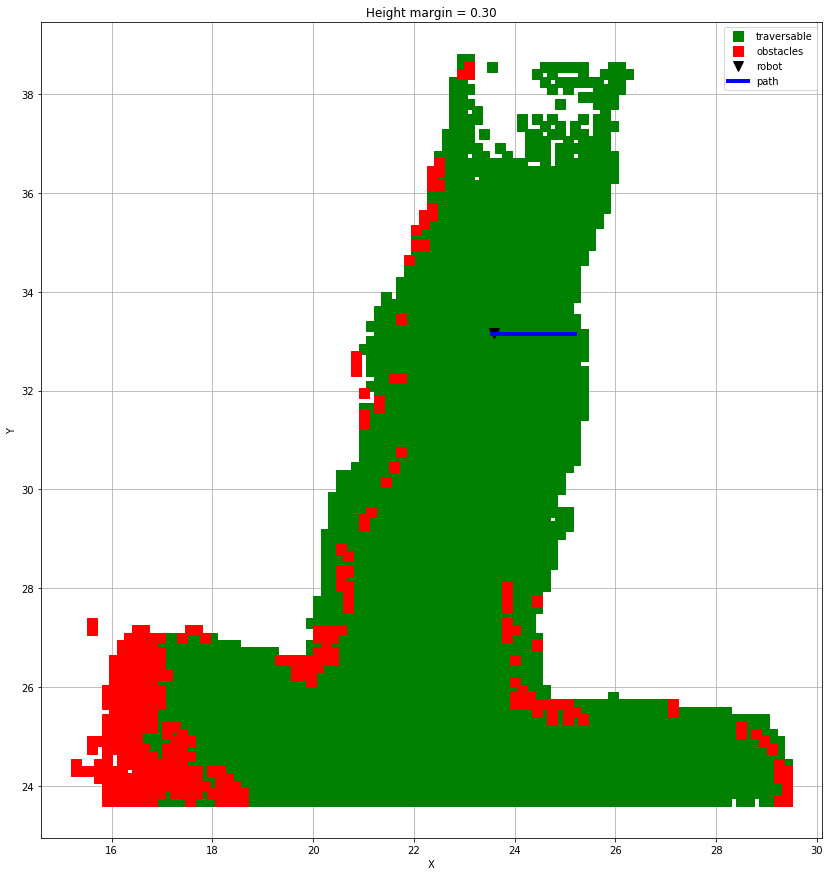

In [31]:
# visualize everithing
X = elev_map[:,0]; Y = elev_map[:,1]; Z = elev_map[:,2]

plt.figure(figsize=(int(np.max(X)-np.min(X)), int(np.max(Y)-np.min(Y))))
plt.plot(X[Z<=margin], Y[Z<=margin], 's', color='green', label='traversable', markersize=10)
plt.plot(X[Z>margin], Y[Z>margin], 's', color='red', label='obstacles', markersize=10)
plt.plot(robot_pose[0], robot_pose[1], 'v', color='k', markersize=10, label='robot')
path_map = np.array(path_map)
plt.plot(path_map[:,0], path_map[:,1], color='b', linewidth=4, label='path')

plt.title('Height margin = %.2f'%margin)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()